Angaramo Piñol, Facundo Nicolás

# **Default of Credit Card Clients**

## **1. Introduction** 

This study took payment data in October, 2005, from an important bank (a cash and credit card issuer) in Taiwan and the targets were credit card holders of the bank. Among the total 30,000 observations, 6,636 observations are the cardholders with default payment. This research employed a binary variable, `DEFAULT` (1 = yes; 0 = no), as the response variable, and used the following 24 variables as predictors:
 
- `ID`: client ID.

- `LIMIT_BAL`: amount of the given credit in NT dollars (includes both the individual consumer and his/her family credit).

- `SEX`: 1 = male; 2 = female.

- `EDUCATION`: 1 = graduate school; 2 = university; 3 = high school; 4 = others.

- `MARRIAGE`: 1 = married; 2 = single; 3 = others.

- `AGE`: age in years.

- `PAY_1` - `PAY_6`: history of past payment from April to September, 2005.

	- `PAY_1` = repayment status in September, 2005.

	- `PAY_2` = repayment status in August, 2005.

	- `PAY_3` = repayment status in July, 2005.

	- `PAY_4` = repayment status in June, 2005.

	- `PAY_5` = repayment status in May, 2005.

	- `PAY_6` = repayment status in April, 2005.

    The measurement scale for the repayment status is: -2 = no consumption; -1 = pay duly; 0 = no delay; 1 = payment delay for one month; 2 = payment daly for two months; … ; 7 = payment delay for seven months; 8 = payment delay for eight months and above. 

- `BILL_AMT1` - `BILL_AMT6`: amount of bill statement in NT dollars.

	- `BILL_AMT1` = amount of bill statement in September, 2005.

	- `BILL_AMT2` = amount of bill statement in August, 2005.

	- `BILL_AMT3` = amount of bill statement in July, 2005.

	- `BILL_AMT4` = amount of bill statement in June, 2005.

	- `BILL_AMT5` = amount of bill statement in May, 2005.

	- `BILL_AMT6` = amount of bill statement in April, 2005.

- `PAY_AMT1` - `PAY_AMT6`: amount of previous payment in NT dollars.

	- `PAY_AMT1` = amount paid in September, 2005.

	- `PAY_AMT2` = amount paid in August, 2005.

	- `PAY_AMT3` = amount paid in July, 2005.

	- `PAY_AMT4` = amount paid in June, 2005.

	- `PAY_AMT5` = amount paid in May, 2005.

	- `PAY_AMT6` = amount paid in April, 2005.

## **2. Exploratory Data Analysis (EDA)**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
data = pd.read_excel("data/Default-of-Credit-Card-Clients.xls", header=1)

In [3]:
data.rename(
    columns={
        "PAY_0": "PAY_1",
        "default payment next month": "DEFAULT"
    }, inplace=True
)

data.drop("ID", axis=1, inplace=True)

data["SEX"] = data["SEX"].map({
    1: "male", 
    2: "female"
})

data["EDUCATION"] = data["EDUCATION"].map({
    0: "others",
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others",
    5: "others",
    6: "others"
})

data["MARRIAGE"] = data["MARRIAGE"].map({
    0: "others",
    1: "married",
    2: "single",
    3: "others"
})

In [4]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_1      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

### **2.1 Response Variable**

In [6]:
print("DEFAULT")
print(f"0: {sum(data.DEFAULT == 0):5d} ({sum(data.DEFAULT == 0) / data.shape[0]:.2f}%)")
print(f"1: {sum(data.DEFAULT == 1):5d} ({sum(data.DEFAULT == 1) / data.shape[0]:.2f}%)")

DEFAULT
0: 23364 (0.78%)
1:  6636 (0.22%)


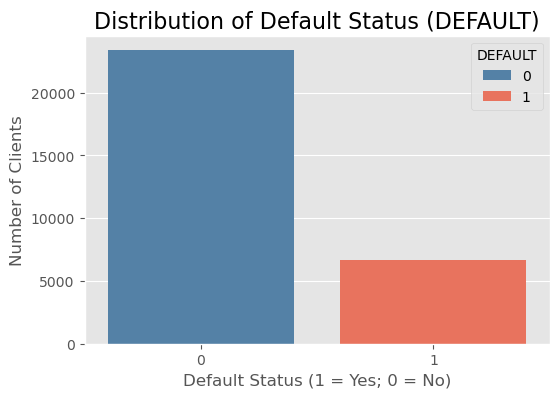

In [7]:
plt.figure(figsize=(6, 4))

sns.countplot(data, x="DEFAULT", hue="DEFAULT", palette=["steelblue", "tomato"])

plt.title("Distribution of Default Status (DEFAULT)", fontsize=16)
plt.xlabel("Default Status (1 = Yes; 0 = No)")
plt.ylabel("Number of Clients")

plt.show()

### **2.2 Predictors**

#### **2.2.1 Categorical Predictors**

**Repayment Status** (`PAY_1` - `PAY_6`)

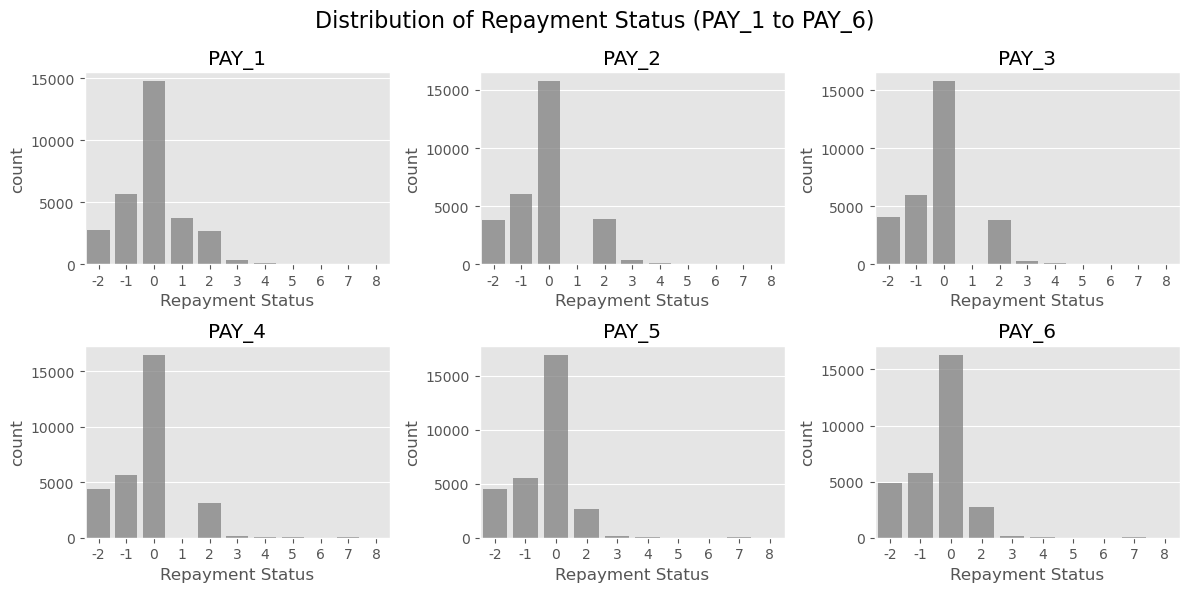

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.suptitle("Distribution of Repayment Status (PAY_1 to PAY_6)", fontsize=16)
for i in range(6):
    row = i // 3
    col = i % 3
    sns.countplot(data, x=f"PAY_{i+1}", ax=ax[row, col], color="grey", alpha=0.75)
    ax[row, col].set_title(f"PAY_{i+1}")
    ax[row, col].set_xlabel("Repayment Status")
plt.tight_layout()
plt.show()

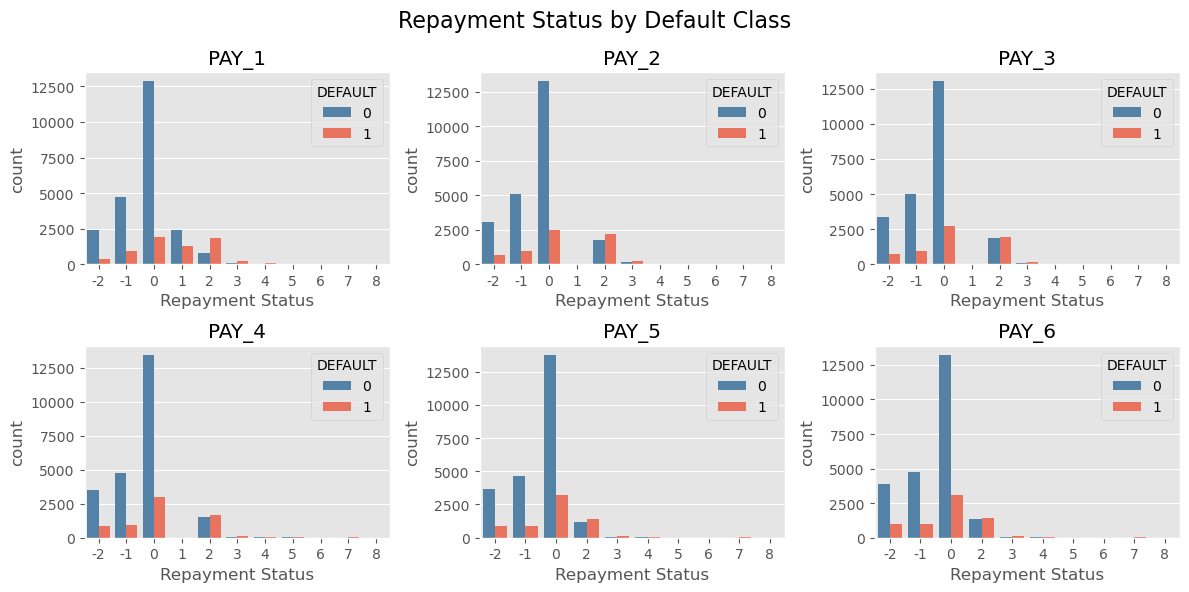

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.suptitle("Repayment Status by Default Class", fontsize=16)
for i in range(6):
    row = i // 3
    col = i % 3
    sns.countplot(data, x=f"PAY_{i+1}", hue="DEFAULT", ax=ax[row, col], palette=["steelblue", "tomato"])
    ax[row, col].set_title(f"PAY_{i+1}")
    ax[row, col].set_xlabel("Repayment Status")
plt.tight_layout()
plt.show()

**Gender** (`SEX`)

In [10]:
pd.DataFrame(data["SEX"].value_counts(normalize=True)) \
    .loc[["male", "female"]] \
    .round(2)

,proportion
SEX,
male,0.4
female,0.6


In [11]:
pd.crosstab(data["SEX"], data["DEFAULT"], normalize="index") \
    .loc[["male", "female"]] \
    .round(2)

DEFAULT,0,1
SEX,,
male,0.76,0.24
female,0.79,0.21


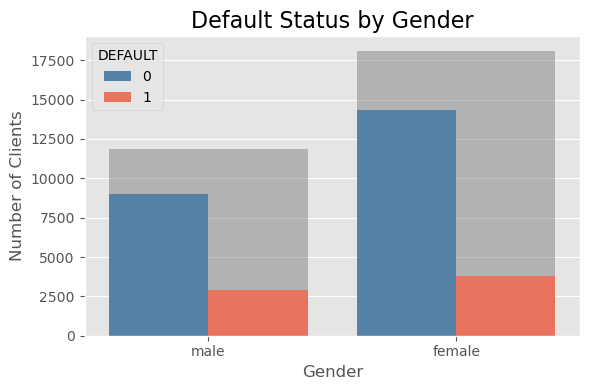

In [12]:
plt.figure(figsize=(6, 4))

sns.countplot(data, x="SEX", color="gray", alpha=0.5, order=["male", "female"])
sns.countplot(data, x="SEX", hue="DEFAULT", palette=["steelblue", "tomato"], order=["male", "female"])

plt.title("Default Status by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Number of Clients")

plt.tight_layout()

plt.show()

**Education Level** (`EDUCATION`)

In [13]:
pd.DataFrame(data["EDUCATION"].value_counts(normalize=True)) \
    .loc[["graduate school", "university", "high school", "others"]] \
    .round(2)

,proportion
EDUCATION,
graduate school,0.35
university,0.47
high school,0.16
others,0.02


In [14]:
pd.crosstab(data["EDUCATION"], data["DEFAULT"], normalize="index") \
    .loc[["graduate school", "university", "high school", "others"]] \
    .round(2)

DEFAULT,0,1
EDUCATION,,
graduate school,0.81,0.19
university,0.76,0.24
high school,0.75,0.25
others,0.93,0.07


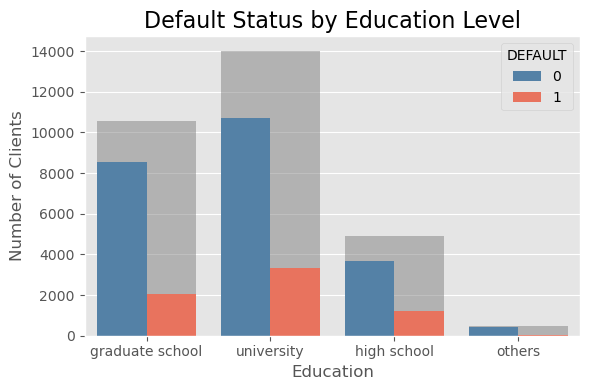

In [15]:
plt.figure(figsize=(6, 4))

sns.countplot(data, x="EDUCATION", color="gray", alpha=0.5, order=["graduate school", "university", "high school", "others"])
sns.countplot(data, x="EDUCATION", hue="DEFAULT", palette=["steelblue", "tomato"], order=["graduate school", "university", "high school", "others"])

plt.title("Default Status by Education Level", fontsize=16)
plt.xlabel("Education")
plt.ylabel("Number of Clients")

plt.tight_layout()

plt.show()

**Marital Status** (`MARRIAGE`)

In [16]:
pd.DataFrame(data["MARRIAGE"].value_counts(normalize=True)) \
    .loc[["married", "single", "others"]] \
    .round(2)

,proportion
MARRIAGE,
married,0.46
single,0.53
others,0.01


In [17]:
pd.crosstab(data["MARRIAGE"], data["DEFAULT"], normalize="index") \
    .loc[["married", "single", "others"]] \
    .round(2)

DEFAULT,0,1
MARRIAGE,,
married,0.77,0.23
single,0.79,0.21
others,0.76,0.24


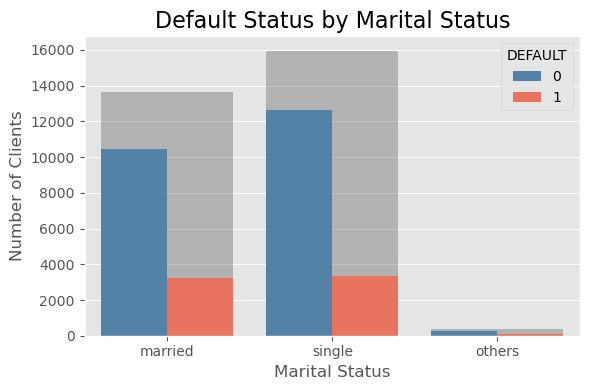

In [18]:
plt.figure(figsize=(6, 4))

sns.countplot(data, x="MARRIAGE", color="gray", alpha=0.5, order=["married", "single", "others"])
sns.countplot(data, x="MARRIAGE", hue="DEFAULT", palette=["steelblue", "tomato"], order=["married", "single", "others"])

plt.title("Default Status by Marital Status", fontsize=16)
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")

plt.tight_layout()

plt.show()

#### **2.2.2 Numerical Predictors**

**Credit Limit** (`LIMIT_BAL`)

In [19]:
data[["LIMIT_BAL"]].describe().round(2)

,LIMIT_BAL
count,30000.00
mean,167484.32
std,129747.66
min,10000.00
25%,50000.00
50%,140000.00
75%,240000.00
max,1000000.00


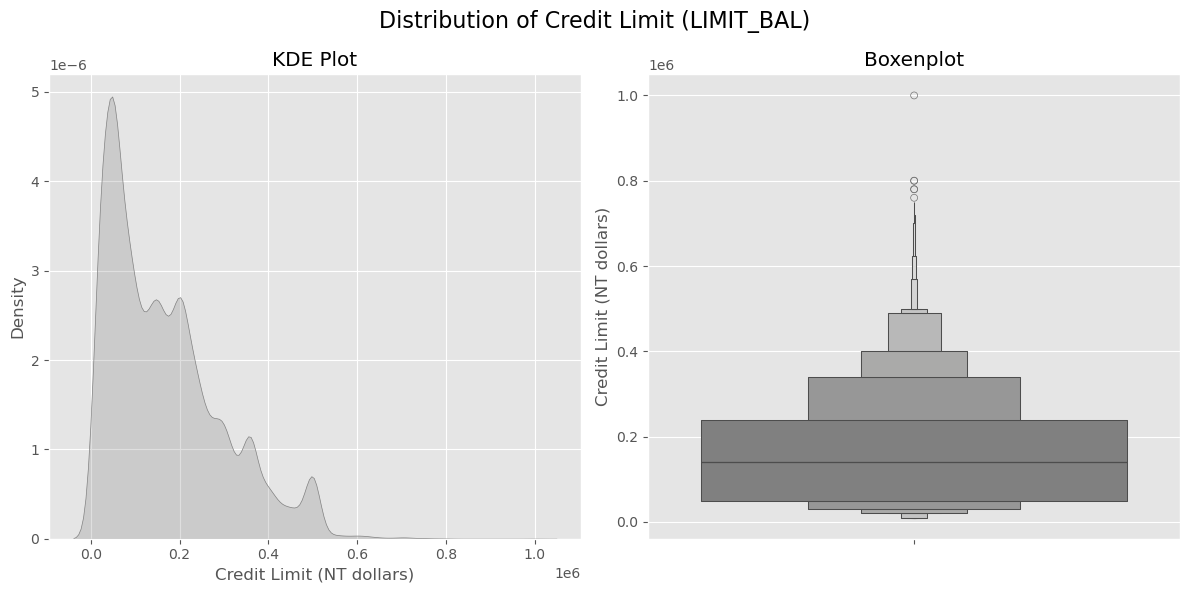

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Distribution of Credit Limit (LIMIT_BAL)", fontsize=16)

sns.kdeplot(data, x="LIMIT_BAL", ax=ax[0], color="grey", fill=True)
ax[0].set_title("KDE Plot")
ax[0].set_xlabel("Credit Limit (NT dollars)")

sns.boxenplot(data=data, y="LIMIT_BAL", ax=ax[1], color="grey")
ax[1].set_title("Boxenplot")
ax[1].set_ylabel("Credit Limit (NT dollars)")

plt.tight_layout()

plt.show()

In [21]:
data[data["LIMIT_BAL"] == 1000000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2197,1000000,female,graduate school,married,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [22]:
data.drop(data[data["LIMIT_BAL"] == 1000000].index, inplace=True)
data.shape

(29999, 24)

In [23]:
data.groupby("DEFAULT")["LIMIT_BAL"].describe().T \
    .round(2)

DEFAULT,0,1
count,23363.00,6636.00
mean,178064.55,130109.66
std,131521.29,115378.54
min,10000.00,10000.00
25%,70000.00,50000.00
50%,150000.00,90000.00
75%,250000.00,200000.00
max,800000.00,740000.00


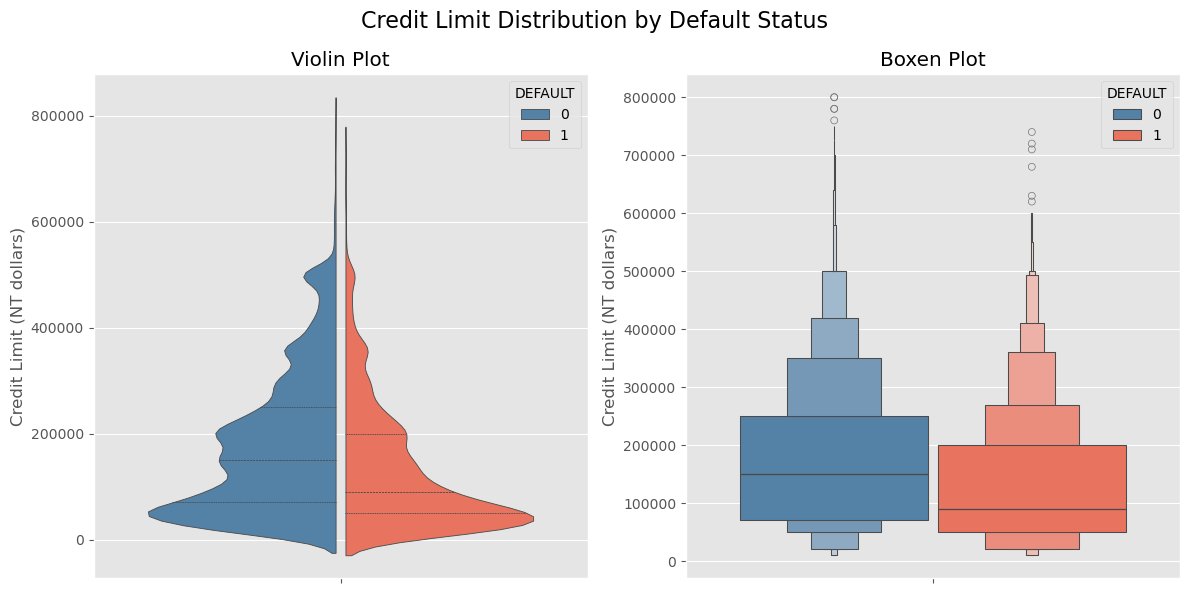

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Credit Limit Distribution by Default Status", fontsize=16)

sns.violinplot(data=data, y="LIMIT_BAL", hue="DEFAULT", ax=ax[0], palette=["steelblue", "tomato"], gap=0.05, split=True, inner="quart")
ax[0].set_title("Violin Plot")
ax[0].set_ylabel("Credit Limit (NT dollars)")

sns.boxenplot(data=data, y="LIMIT_BAL", hue="DEFAULT", ax=ax[1], palette=["steelblue", "tomato"], gap=0.05)
ax[1].set_title("Boxen Plot")
ax[1].set_ylabel("Credit Limit (NT dollars)")

plt.tight_layout()

plt.show()

**Age** (`AGE`)

In [25]:
data[["AGE"]].describe().round(2)

,AGE
count,29999.00
mean,35.49
std,9.22
min,21.00
25%,28.00
50%,34.00
75%,41.00
max,79.00


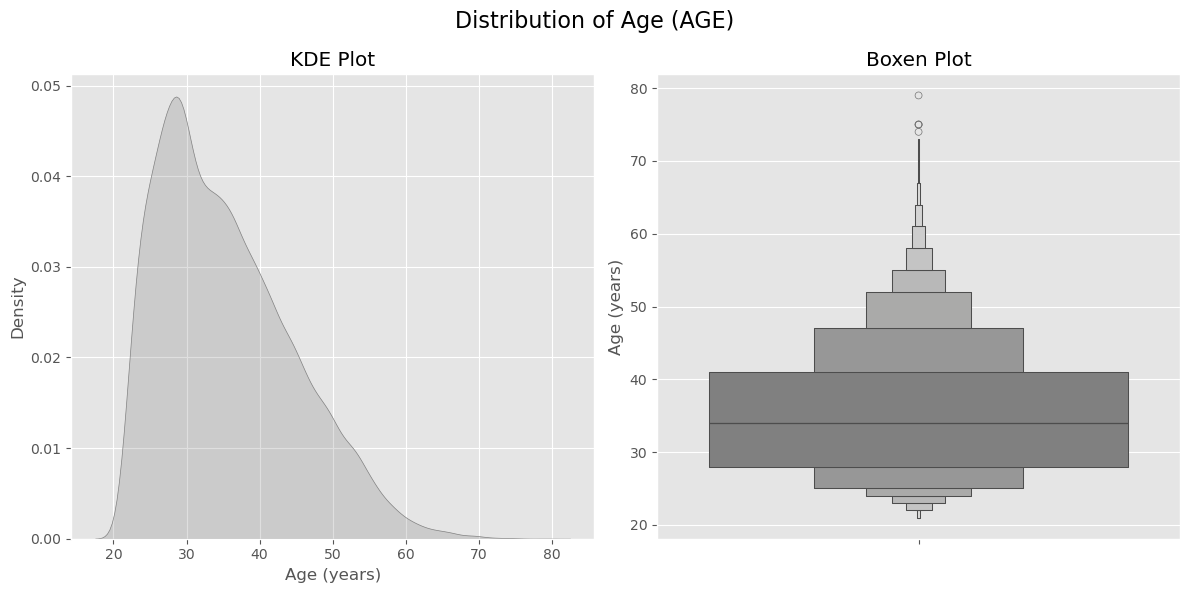

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Distribution of Age (AGE)", fontsize=16)

sns.kdeplot(data=data, x="AGE", ax=ax[0], color="grey", fill=True)
ax[0].set_title("KDE Plot")
ax[0].set_xlabel("Age (years)")

sns.boxenplot(data=data, y="AGE", ax=ax[1], color="grey")
ax[1].set_title("Boxen Plot")
ax[1].set_ylabel("Age (years)")

plt.tight_layout()

plt.show()

In [27]:
data.groupby("DEFAULT")["AGE"].describe().T \
    .round(2)

DEFAULT,0,1
count,23363.00,6636.00
mean,35.42,35.73
std,9.08,9.69
min,21.00,21.00
25%,28.00,28.00
50%,34.00,34.00
75%,41.00,42.00
max,79.00,75.00


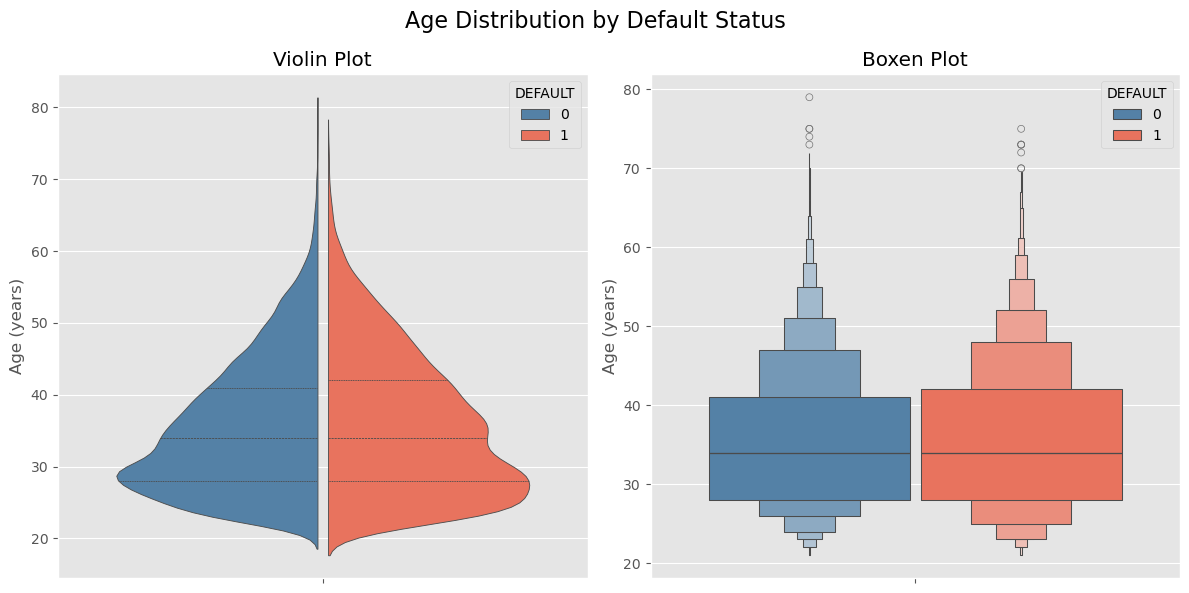

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Age Distribution by Default Status", fontsize=16)

sns.violinplot(data=data, y="AGE", hue="DEFAULT", ax=ax[0], palette=["steelblue", "tomato"], gap=0.05, split=True, inner="quart")
ax[0].set_title("Violin Plot")
ax[0].set_ylabel("Age (years)")

sns.boxenplot(data=data, y="AGE", hue="DEFAULT", ax=ax[1], palette=["steelblue", "tomato"], gap=0.05)
ax[1].set_title("Boxen Plot")
ax[1].set_ylabel("Age (years)")

plt.tight_layout()

plt.show()

**Amount of Bill Statement** (`BILL_ATM1` - `BILL_ATM6`)

In [29]:
data.loc[:, "BILL_AMT1":"BILL_AMT6"].describe().round(2)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29999.00,29999.00,29999.00,29999.00,29999.00,29999.00
mean,51192.89,49147.92,46996.89,43234.67,40281.84,38841.00
std,73448.04,70970.04,69293.28,64147.20,60582.15,59316.29
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
25%,3558.50,2984.50,2665.50,2326.50,1763.00,1256.00
50%,22381.00,21197.00,20088.00,19052.00,18104.00,17068.00
75%,67089.00,64002.50,60163.50,54494.50,50182.50,49183.50
max,746814.00,743970.00,1664089.00,706864.00,823540.00,699944.00


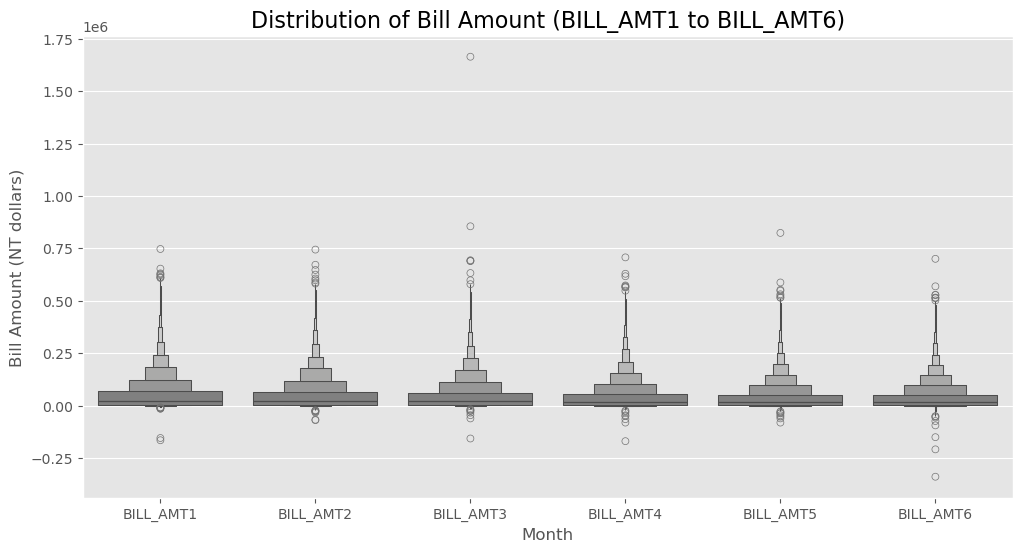

In [30]:
BILL_AMT = data.loc[:, "BILL_AMT1":"BILL_AMT6"].melt(var_name="BILL_COLS", value_name="BILL_AMOUNT")

plt.figure(figsize=(12, 6))

sns.boxenplot(BILL_AMT, x="BILL_COLS", y="BILL_AMOUNT", color="grey")

plt.title("Distribution of Bill Amount (BILL_AMT1 to BILL_AMT6)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Bill Amount (NT dollars)")

plt.show()

In [31]:
data[(data["BILL_AMT3"] > 1000000) | (data["BILL_AMT6"] < -250000)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
290,280000,male,graduate school,single,33,-1,-1,-1,-1,-1,...,898,325,-339603,898,325,898,325,0,345293,1
5296,500000,female,graduate school,married,33,-2,-2,-1,-1,-2,...,121757,97115,377217,4366,1684259,121831,97670,379267,26759,0


In [32]:
data.drop(data[(data["BILL_AMT3"] > 1000000) | (data["BILL_AMT6"] < -250000)].index, inplace=True)
data.shape

(29997, 24)

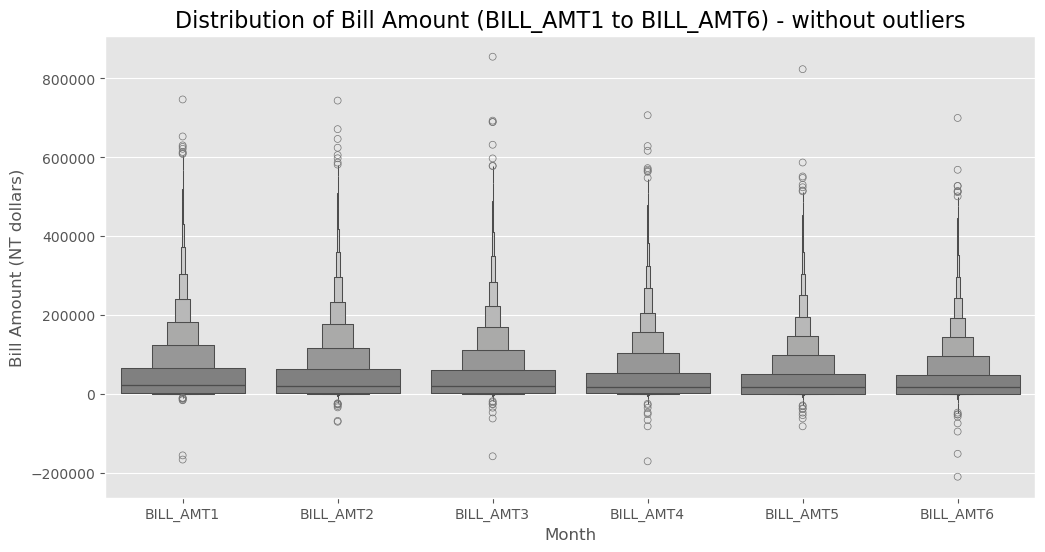

In [33]:
BILL_AMT = BILL_AMT[(BILL_AMT["BILL_AMOUNT"] < 1000000) & (BILL_AMT["BILL_AMOUNT"] > -250000)]

plt.figure(figsize=(12, 6))

sns.boxenplot(BILL_AMT, x="BILL_COLS", y="BILL_AMOUNT", color="grey")

plt.title("Distribution of Bill Amount (BILL_AMT1 to BILL_AMT6) - without outliers", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Bill Amount (NT dollars)")

plt.show()

In [34]:
data.groupby("DEFAULT")[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]] \
    .describe().T \
    .round(2)

DEFAULT                  0          1
BILL_AMT1 count   23362.00    6635.00
          mean    51957.39   48516.34
          std     73337.35   73785.31
          min   -165580.00   -6676.00
          25%      3678.25    2993.50
          50%     23119.50   20186.00
          75%     69020.50   59667.00
          max    746814.00  613860.00
BILL_AMT2 count   23362.00    6635.00
          mean    49680.35   47290.61
          std     70768.13   71654.17
          min    -69777.00  -17710.00
          25%      3056.50    2697.50
          50%     21660.50   20305.00
          75%     65672.50   57920.50
          max    743970.00  581775.00
BILL_AMT3 count   23362.00    6635.00
          mean    47443.30   45188.36
          std     68697.03   68519.93
          min   -157264.00  -61506.00
          25%      2767.25    2500.00
          50%     20200.00   19839.00
          75%     61888.75   54734.50
          max    855086.00  578971.00
BILL_AMT4 count   23362.00    6635.00
          mean    43571.52   42043.15
          std     64085.80   64353.94
          min   -170000.00  -65167.00
          25%      2360.00    2144.00
          50%     19000.00   19121.00
          75%     55955.50   50178.50
          max    706864.00  548020.00
BILL_AMT5 count   23362.00    6635.00
          mean    40490.07   39546.10
          std     60340.51   61427.44
          min    -81334.00  -53007.00
          25%      1823.00    1507.00
          50%     17994.50   18487.00
          75%     51125.50   47856.00
          max    823540.00  547880.00
BILL_AMT6 count   23362.00    6635.00
          mean    38988.30   38328.39
          std     59201.47   59403.25
          min   -209051.00  -94625.00
          25%      1264.50    1150.00
          50%     16677.50   18034.00
          75%     49838.25   47430.00
          max    699944.00  514975.00

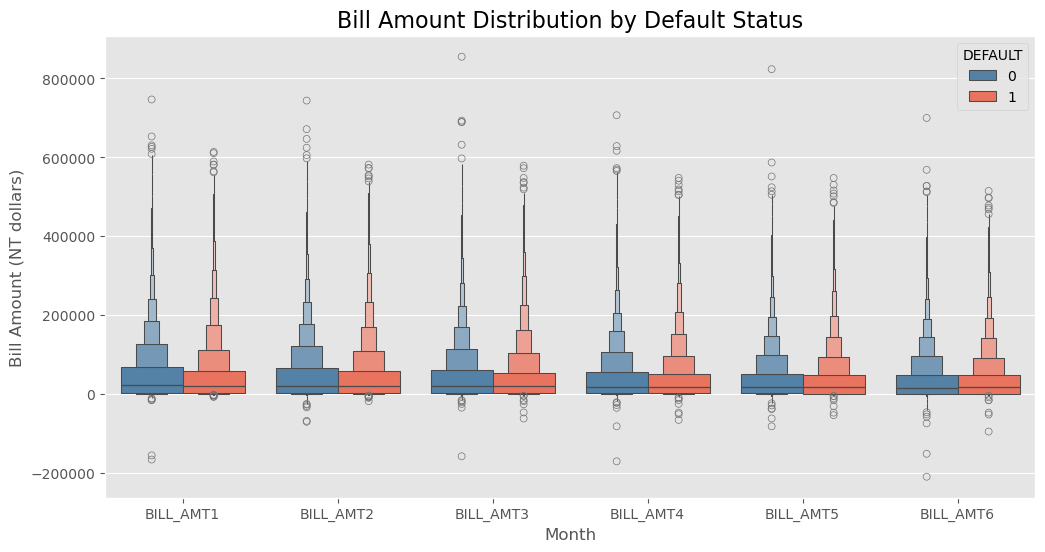

In [35]:
BILL_AMT = data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "DEFAULT"]] \
    .melt(id_vars="DEFAULT", var_name="BILL_COLS", value_name="BILL_AMOUNT")

plt.figure(figsize=(12, 6))

sns.boxenplot(BILL_AMT, x="BILL_COLS", y="BILL_AMOUNT", hue="DEFAULT", palette=["steelblue", "tomato"])

plt.title("Bill Amount Distribution by Default Status", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Bill Amount (NT dollars)")

plt.show()

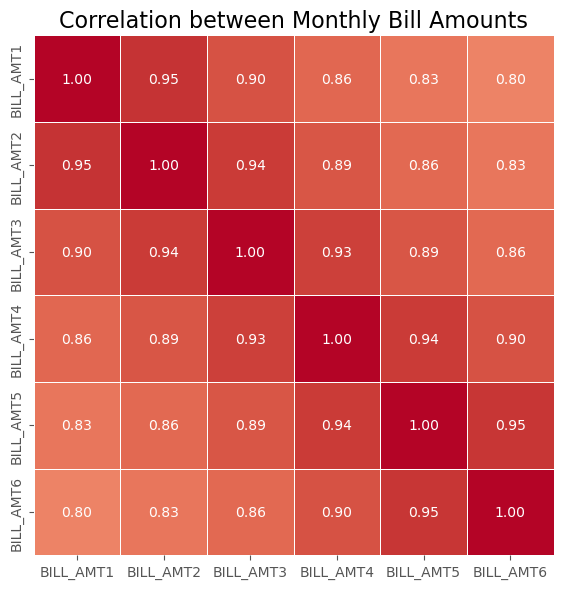

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data.loc[:, "BILL_AMT1":"BILL_AMT6"].corr(),
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar=False,
    square=True
)
plt.title("Correlation between Monthly Bill Amounts", fontsize=16)
plt.tight_layout()
plt.show()

**Amount Paid** (`PAY_ATM1` - `PAY_ATM6`)

In [37]:
data.loc[:, "PAY_AMT1":"PAY_AMT6"].describe().round(2)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00
mean,5662.28,5863.91,5192.24,4821.63,4785.56,5201.95
std,16562.04,20903.52,16826.34,15655.57,15123.03,17667.23
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,833.00,390.00,296.00,253.00,117.00
50%,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,5006.00,5000.00,4504.00,4013.00,4031.00,4000.00
max,873552.00,1227082.00,889043.00,621000.00,426529.00,528666.00


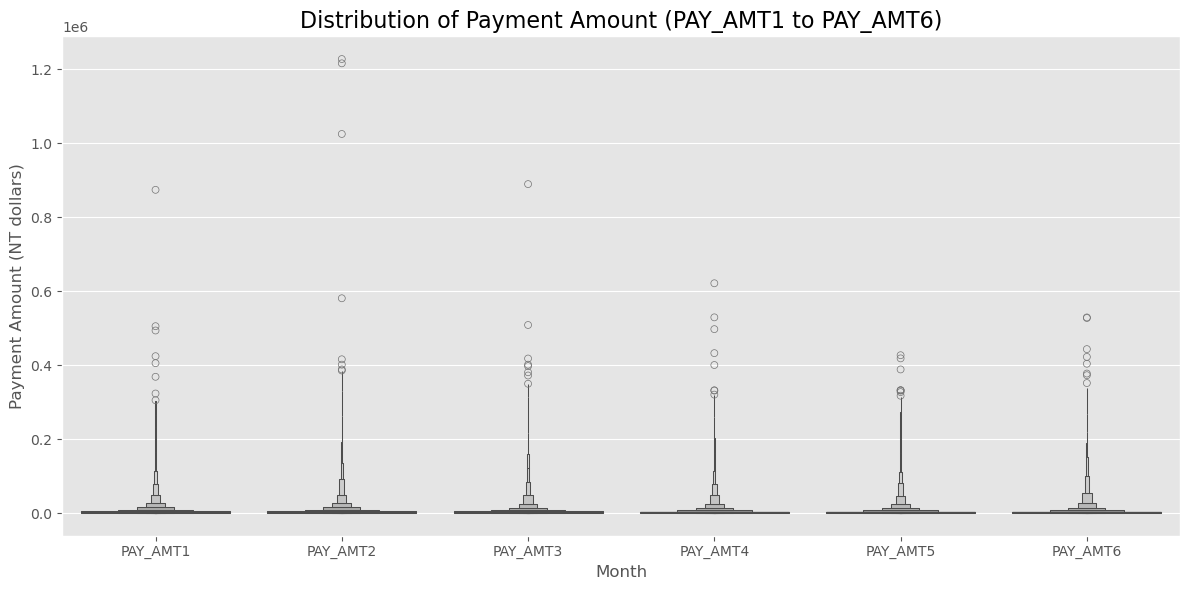

In [38]:
PAY_AMT = data.loc[:, "PAY_AMT1":"PAY_AMT6"].melt(var_name="PAY_COLS", value_name="PAY_AMOUNT")

plt.figure(figsize=(12, 6))

sns.boxenplot(PAY_AMT, x="PAY_COLS", y="PAY_AMOUNT", color="grey")

plt.title("Distribution of Payment Amount (PAY_AMT1 to PAY_AMT6)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Payment Amount (NT dollars)")

plt.tight_layout()

plt.show()

In [39]:
data[(data["PAY_AMT1"] > 800000) | (data["PAY_AMT2"] > 800000) | (data["PAY_AMT3"] > 800000)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
25731,80000,female,high school,married,37,0,0,-2,-2,-2,...,632,632,124542,215,1024516,632,632,124542,14770,0
28003,510000,female,graduate school,single,30,-1,-1,-1,-1,0,...,163628,117475,116656,493358,1227082,164577,510,6239,4550,0
28716,340000,female,graduate school,others,42,-1,-1,-1,-1,-1,...,205931,265431,270237,873552,1215471,889043,621000,20000,145000,0


In [40]:
data.drop(data[(data["PAY_AMT1"] > 800000) | (data["PAY_AMT2"] > 800000) | (data["PAY_AMT3"] > 800000)].index, inplace=True)
data.shape

(29994, 24)

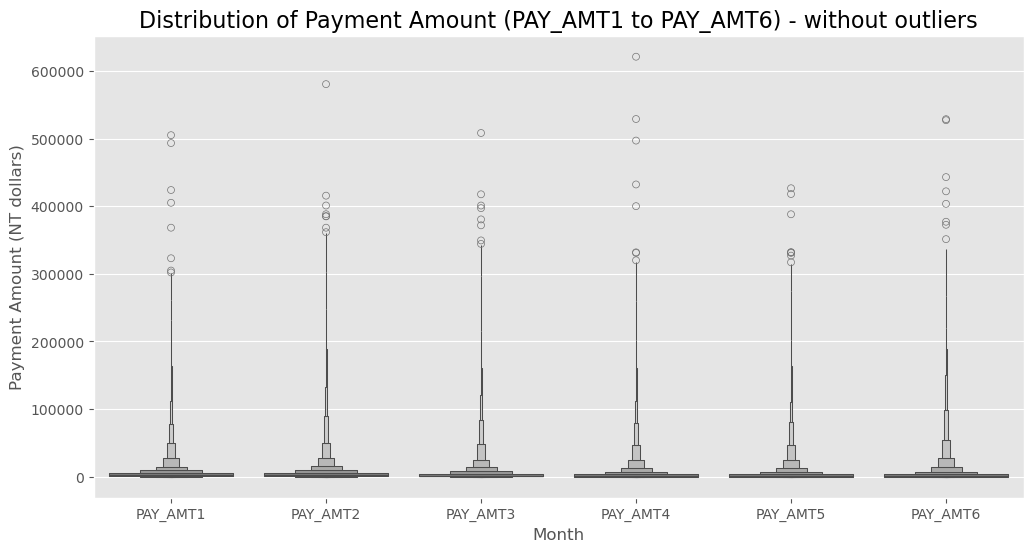

In [41]:
PAY_AMT = PAY_AMT[(PAY_AMT["PAY_AMOUNT"] < 800000)]

plt.figure(figsize=(12, 6))

sns.boxenplot(PAY_AMT, x="PAY_COLS", y="PAY_AMOUNT", color="grey")

plt.title("Distribution of Payment Amount (PAY_AMT1 to PAY_AMT6) - without outliers", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Payment Amount (NT dollars)")

plt.show()

In [42]:
data.groupby("DEFAULT")[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]] \
    .describe().T \
    .round(2)

DEFAULT                 0          1
PAY_AMT1 count   23359.00    6635.00
         mean     6247.80    3397.42
         std     16797.23    9544.92
         min         0.00       0.00
         25%      1163.50       0.00
         50%      2458.00    1639.00
         75%      5605.00    3478.50
         max    505000.00  300000.00
PAY_AMT2 count   23359.00    6635.00
         mean     6419.19    3389.11
         std     18682.51   11738.81
         min         0.00       0.00
         25%      1005.00       0.00
         50%      2246.00    1534.00
         75%      5306.00    3310.50
         max    580464.00  358689.00
PAY_AMT3 count   23359.00    6635.00
         mean     5666.02    3367.72
         std     16738.45   12960.57
         min         0.00       0.00
         25%       600.00       0.00
         50%      2000.00    1224.00
         75%      5000.00    3000.00
         max    417588.00  508229.00
PAY_AMT4 count   23359.00    6635.00
         mean     5268.71    3156.05
         std     16184.10   11192.76
         min         0.00       0.00
         25%       390.00       0.00
         50%      1734.00    1000.00
         75%      4601.50    2940.50
         max    528897.00  432130.00
PAY_AMT5 count   23359.00    6635.00
         mean     5224.51    3219.62
         std     15863.79   11945.57
         min         0.00       0.00
         25%       369.00       0.00
         50%      1764.00    1000.00
         75%      4600.00    3000.00
         max    426529.00  332000.00
PAY_AMT6 count   23359.00    6635.00
         mean     5710.26    3389.96
         std     18769.99   12794.08
         min         0.00       0.00
         25%       300.00       0.00
         50%      1706.00    1000.00
         75%      4539.00    2972.50
         max    528666.00  287982.00

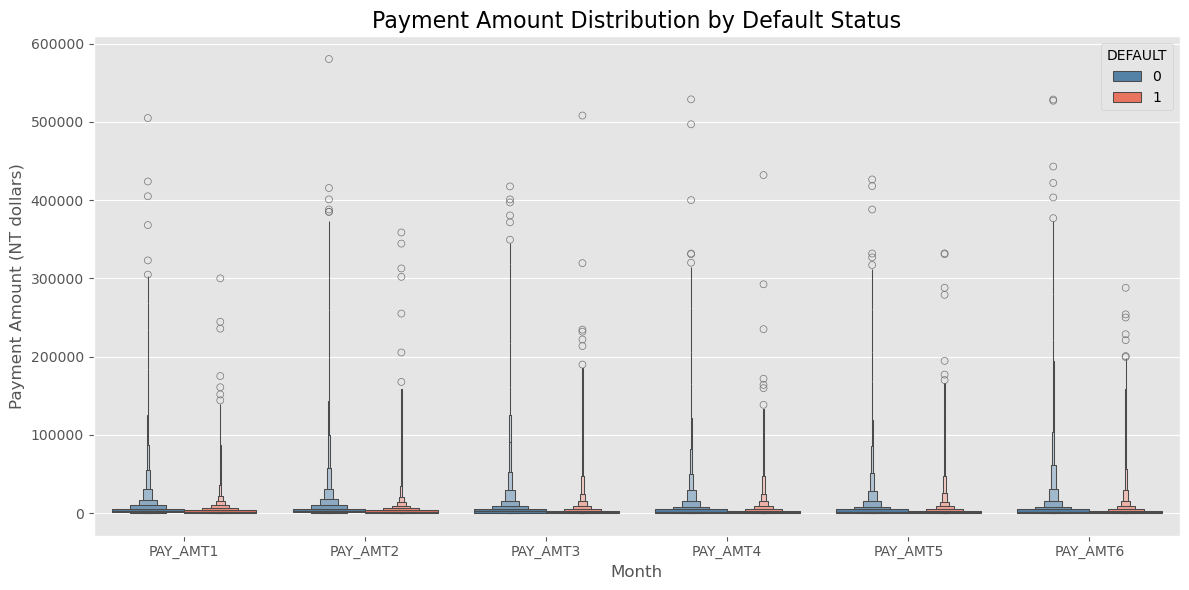

In [43]:
PAY_AMT = data[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "DEFAULT"]] \
    .melt(id_vars="DEFAULT", var_name="PAY_COLS", value_name="PAY_AMOUNT")

plt.figure(figsize=(12, 6))

sns.boxenplot(PAY_AMT, x="PAY_COLS", y="PAY_AMOUNT", hue="DEFAULT", palette=["steelblue", "tomato"])

plt.title("Payment Amount Distribution by Default Status", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Payment Amount (NT dollars)")

plt.tight_layout()

plt.show()

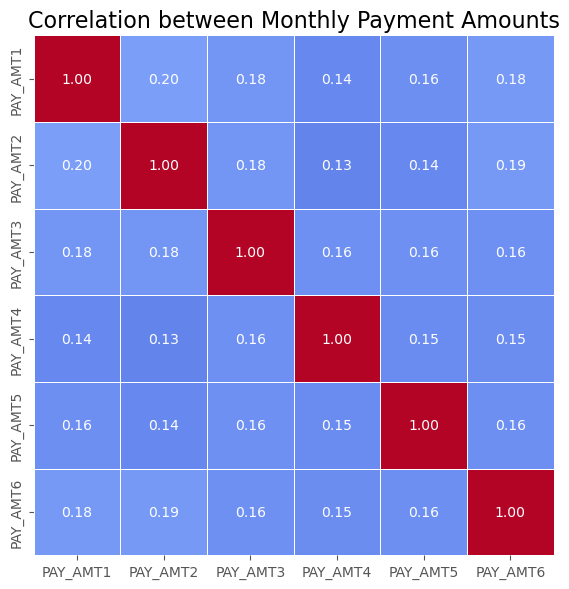

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data.loc[:, "PAY_AMT1":"PAY_AMT6"].corr(),
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar=False,
    square=True
)
plt.title("Correlation between Monthly Payment Amounts", fontsize=16)
plt.tight_layout()
plt.show()

## **3. Feature Engineering**

**Average Payment Delay** (`AVG_DELAY`)

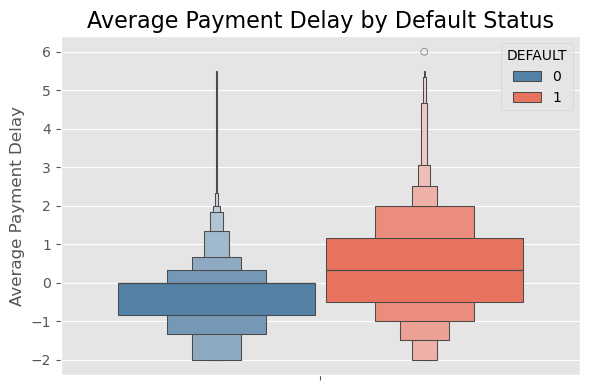

In [45]:
data["AVG_DELAY"] =  data.loc[:, "PAY_1":"PAY_6"].mean(axis=1)

plt.figure(figsize=(6, 4))

sns.boxenplot(data=data, y="AVG_DELAY", hue="DEFAULT", palette=["steelblue", "tomato"], gap=0.05)

plt.title("Average Payment Delay by Default Status", fontsize=16)
plt.ylabel("Average Payment Delay")

plt.tight_layout()

plt.show()

**Maximum Payment Delay** (`MAX_DELAY`)

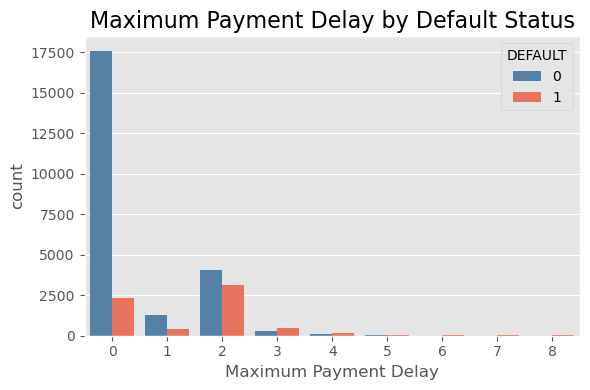

In [46]:
data["MAX_DELAY"] =  data.loc[:, "PAY_1":"PAY_6"].max(axis=1)
data.loc[data["MAX_DELAY"].isin([-2, -1]), "MAX_DELAY"] = 0

plt.figure(figsize=(6, 4))

sns.countplot(data=data, x="MAX_DELAY", hue="DEFAULT", palette=["steelblue", "tomato"])

plt.title("Maximum Payment Delay by Default Status", fontsize=16)
plt.xlabel("Maximum Payment Delay")

plt.tight_layout()

plt.show()

**Number of Months with Payment Delay** (`COUNT_DELAY`)

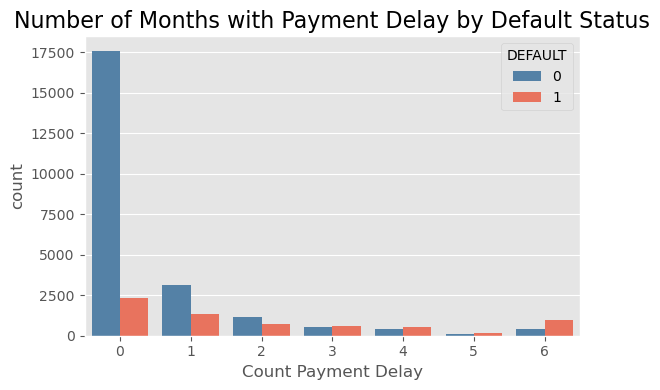

In [47]:
data["COUNT_DELAY"] = data.loc[:, "PAY_1":"PAY_6"].apply(lambda x: (x > 0).sum(), axis=1)

plt.figure(figsize=(6, 4))

sns.countplot(data=data, x="COUNT_DELAY", hue="DEFAULT", palette=["steelblue", "tomato"])

plt.title("Number of Months with Payment Delay by Default Status", fontsize=16)
plt.xlabel("Count Payment Delay")

plt.tight_layout()

plt.show()

**New Repayment Status** (`PAY_1` - `PAY_6`)

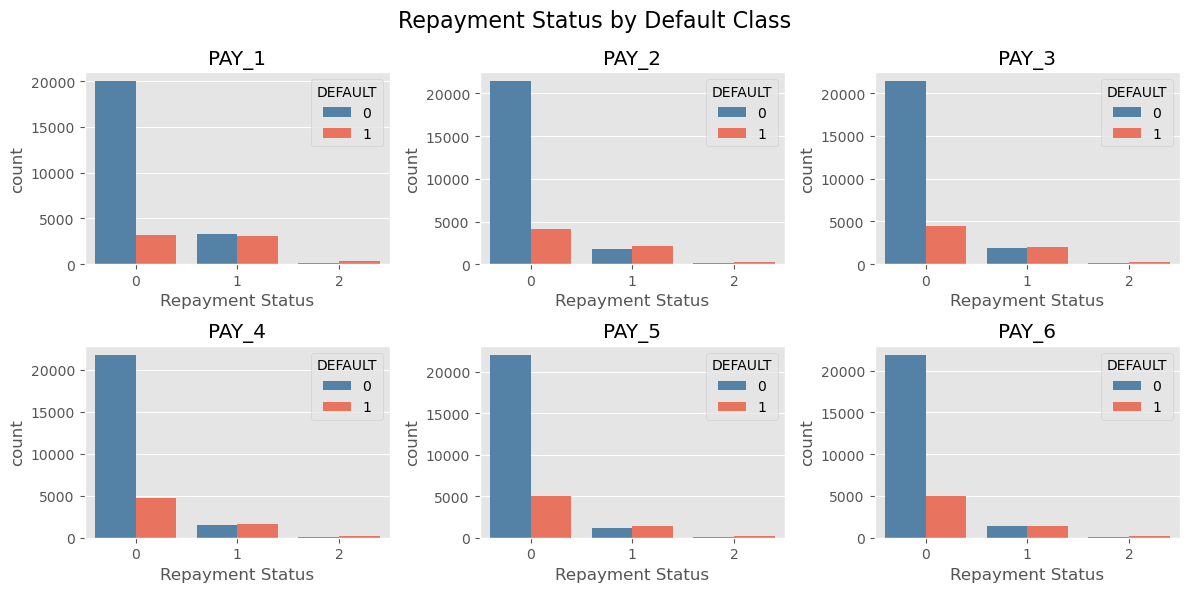

In [48]:
def PAY(x):
    if x <= 0:
        return 0
    elif x <= 2:
        return 1
    else:
        return 2

for i in range(6):
    data[f"PAY_{i+1}"] = data[f"PAY_{i+1}"].apply(PAY)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.suptitle("Repayment Status by Default Class", fontsize=16)
for i in range(6):
    row = i // 3
    col = i % 3
    sns.countplot(data, x=f"PAY_{i+1}", hue="DEFAULT", ax=ax[row, col], palette=["steelblue", "tomato"])
    ax[row, col].set_title(f"PAY_{i+1}")
    ax[row, col].set_xlabel("Repayment Status")
plt.tight_layout()
plt.show()

**Age Group** (`AGE_GROUP`)

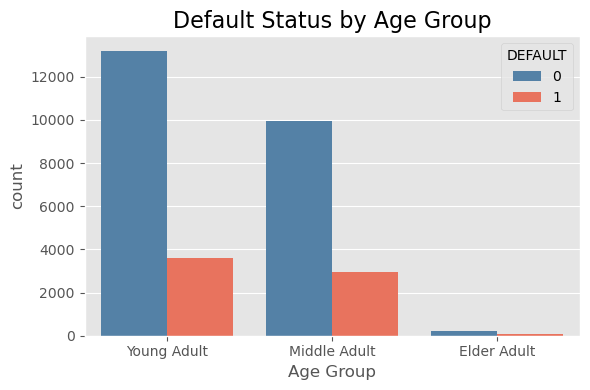

In [49]:
def AGE_GROUP(x):
    if x <= 35:
        return "Young Adult"
    elif x <= 60:
        return "Middle Adult"
    else:
        return "Elder Adult"

data["AGE_GROUP"] = data["AGE"].apply(AGE_GROUP)
data.drop("AGE", axis=1, inplace=True)

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="AGE_GROUP", hue="DEFAULT", palette=["steelblue", "tomato"], order=["Young Adult", "Middle Adult", "Elder Adult"])
plt.title("Default Status by Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

## **4. Data Preprocessing**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler,
    MinMaxScaler
)

In [51]:
seed = 42

In [52]:
X = data.drop("DEFAULT", axis=1)
y = data["DEFAULT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=seed, stratify=y
)

In [53]:
cat_cols = [
    "SEX", "EDUCATION", "MARRIAGE", "AGE_GROUP"
]

num_cols = [
    "LIMIT_BAL", 
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

pay_cols = [
    "AVG_DELAY", "MAX_DELAY", "COUNT_DELAY"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
        ("pay", MinMaxScaler(), pay_cols)
    ], remainder="passthrough"
) 
preprocessor.fit(X_train)

X_train, X_test = preprocessor.transform(X_train), preprocessor.transform(X_test)

## **5. Model Selection**

- **Naive Bayes** 

- **Logistic Regression** 

- **Support Vector Machines** 

- **Random Forest** 

- **Gradient Boosting**

## **6. Model Training**

In [54]:
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier
)
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV, 
    GridSearchCV
)

**Naive Bayes**

In [55]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

**Logistic Regression**

In [56]:
t0 = time.time()

logit = GridSearchCV(
    LogisticRegression(
        class_weight="balanced",
        max_iter=1000
    ),
    param_grid={
        "C": [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed),
    verbose=1
)
logit.fit(X_train, y_train)

tf = time.time()

print(f"Fit Time: {int((tf - t0) // 60)}m {(tf - t0) % 60:.1f}s\n")
print(f"Best Parameters: {logit.best_params_} - Logistic Regression")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fit Time: 0m 2.6s

Best Parameters: {'C': 0.01} - Logistic Regression


**Support Vector Machines**

In [57]:
t0 = time.time()

svc = GridSearchCV(
    SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced",
        random_state=seed
    ),
    param_grid={
        "C": [0.1, 1.0, 10.0],
        "gamma": ["scale", "auto"]
    },
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed),
    verbose=1
)
svc.fit(X_train, y_train)

tf = time.time()

print(f"Fit Time: {int((tf - t0) // 60)}m {(tf - t0) % 60:.1f}s\n")
print(f"Best Parameters: {svc.best_params_} - Support Vector Machines")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fit Time: 30m 39.2s

Best Parameters: {'C': 1.0, 'gamma': 'scale'} - Support Vector Machines


**Random Forest**

In [58]:
t0 = time.time()

rf = RandomizedSearchCV(
    RandomForestClassifier(    
        criterion="gini",
        bootstrap=True,
        random_state=seed,
        class_weight="balanced"
    ),
    param_distributions={
        "n_estimators": [100, 200, 400, 800, 1000],
        "max_depth": [10, 20, 30, None],
        "min_samples_split": [2, 4, 8],
        "min_samples_leaf": [1, 2, 4]
    },
    n_iter=50,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed),
    verbose=1,
    random_state=seed
)
rf.fit(X_train, y_train)

tf = time.time()

print(f"Fit Time: {int((tf - t0) // 60)}m {(tf - t0) % 60:.1f}s\n")
print(f"Best Parameters: {rf.best_params_} - Random Forest")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fit Time: 51m 44.8s

Best Parameters: {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 10} - Random Forest


**Gradient Boosting**

In [59]:
t0 = time.time()

hgb = RandomizedSearchCV(
    HistGradientBoostingClassifier(
        random_state=seed,
        class_weight="balanced"
    ),
    param_distributions={
        "learning_rate":[0.001, 0.003, 0.01, 0.03, 0.1],
        "max_iter": [100, 200, 400, 800, 1000],
        "max_leaf_nodes": [16, 31, 62, 123],
        "min_samples_leaf": [10, 20, 30, 40],
    },
    n_iter=50,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed),
    verbose=1,
    random_state=seed
)
hgb.fit(X_train, y_train)

tf = time.time()

print(f"Fit Time: {int((tf - t0) // 60)}m {(tf - t0) % 60:.1f}\n")
print(f"Best Parameters: {hgb.best_params_} - Gradient Boosting")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fit Time: 42m 57.2

Best Parameters: {'min_samples_leaf': 20, 'max_leaf_nodes': 123, 'max_iter': 800, 'learning_rate': 0.1} - Gradient Boosting


## **7. Model Evaluation**

In [60]:
import functions

from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
    classification_report, accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, average_precision_score
)

In [61]:
models = {
    "Naive Bayes": nb,
    "Logistic Regression": logit,
    "Support Vector Machines": svc,
    "Random Forest": rf,
    "Gradient Boosting":hgb
}

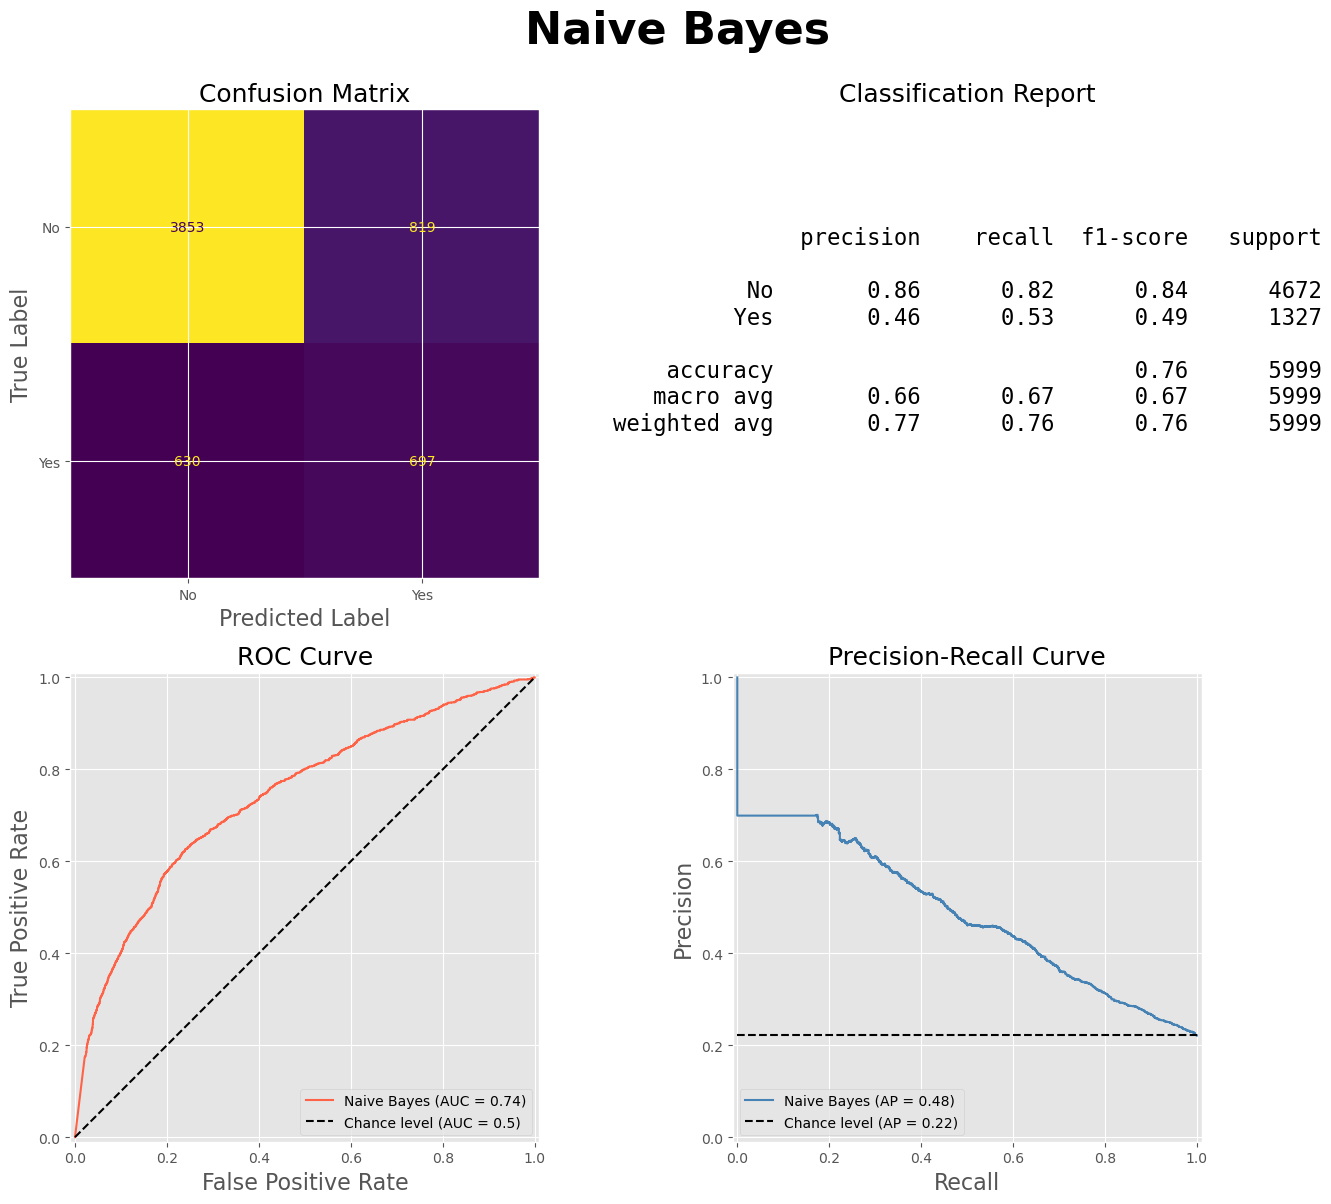

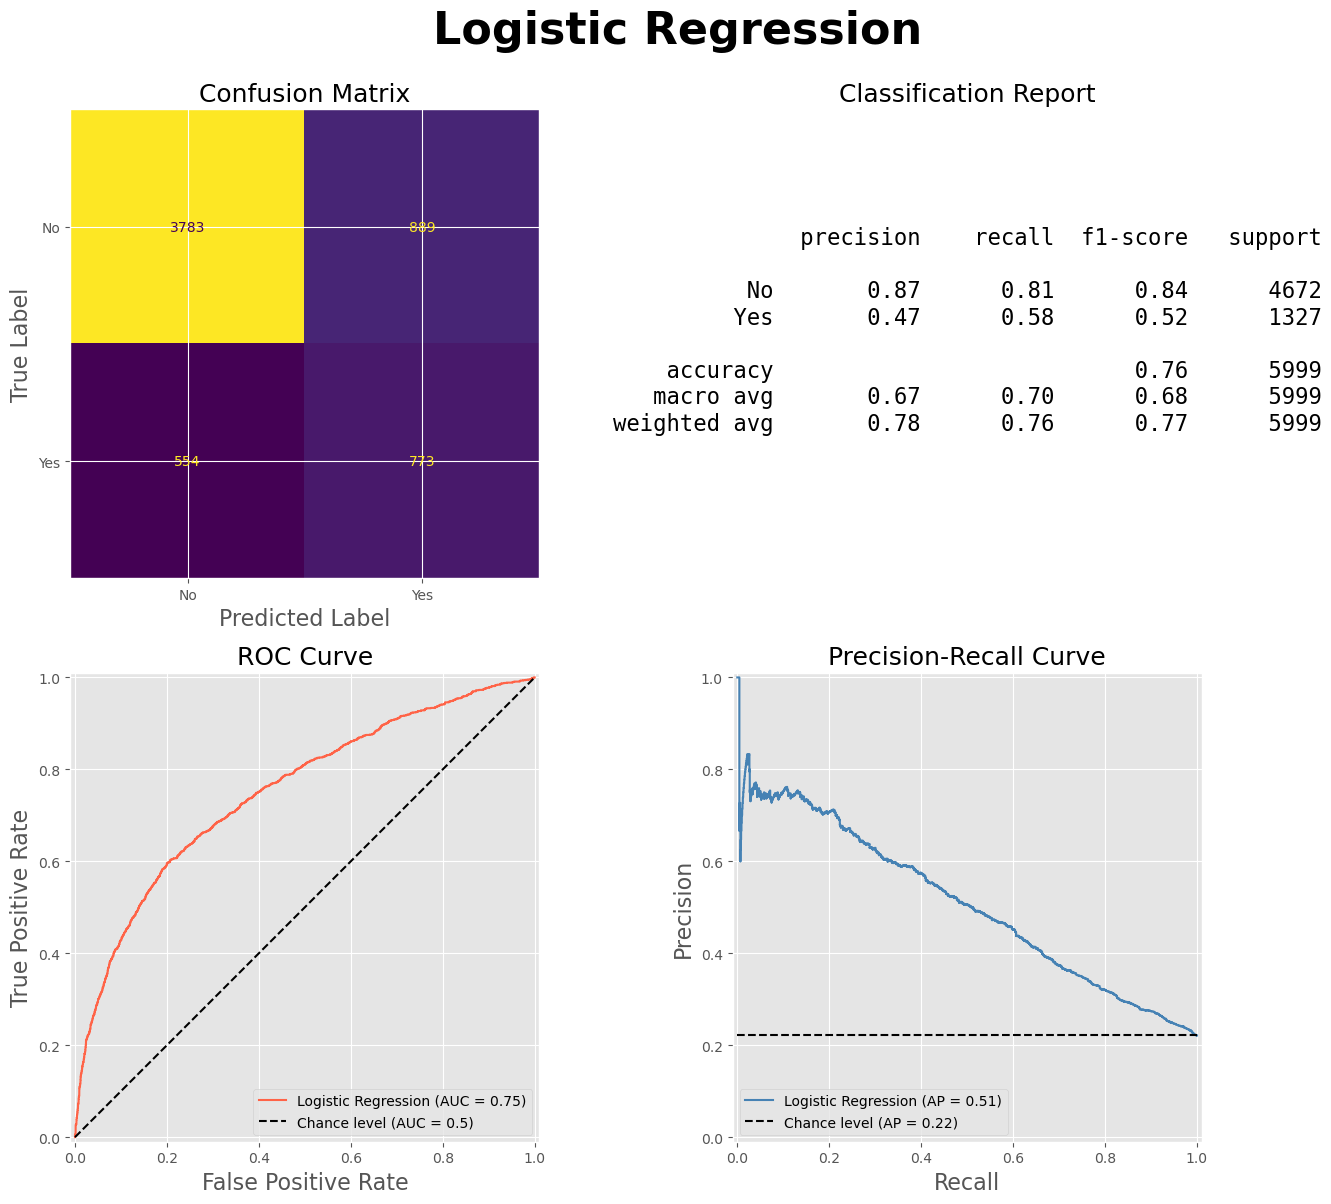

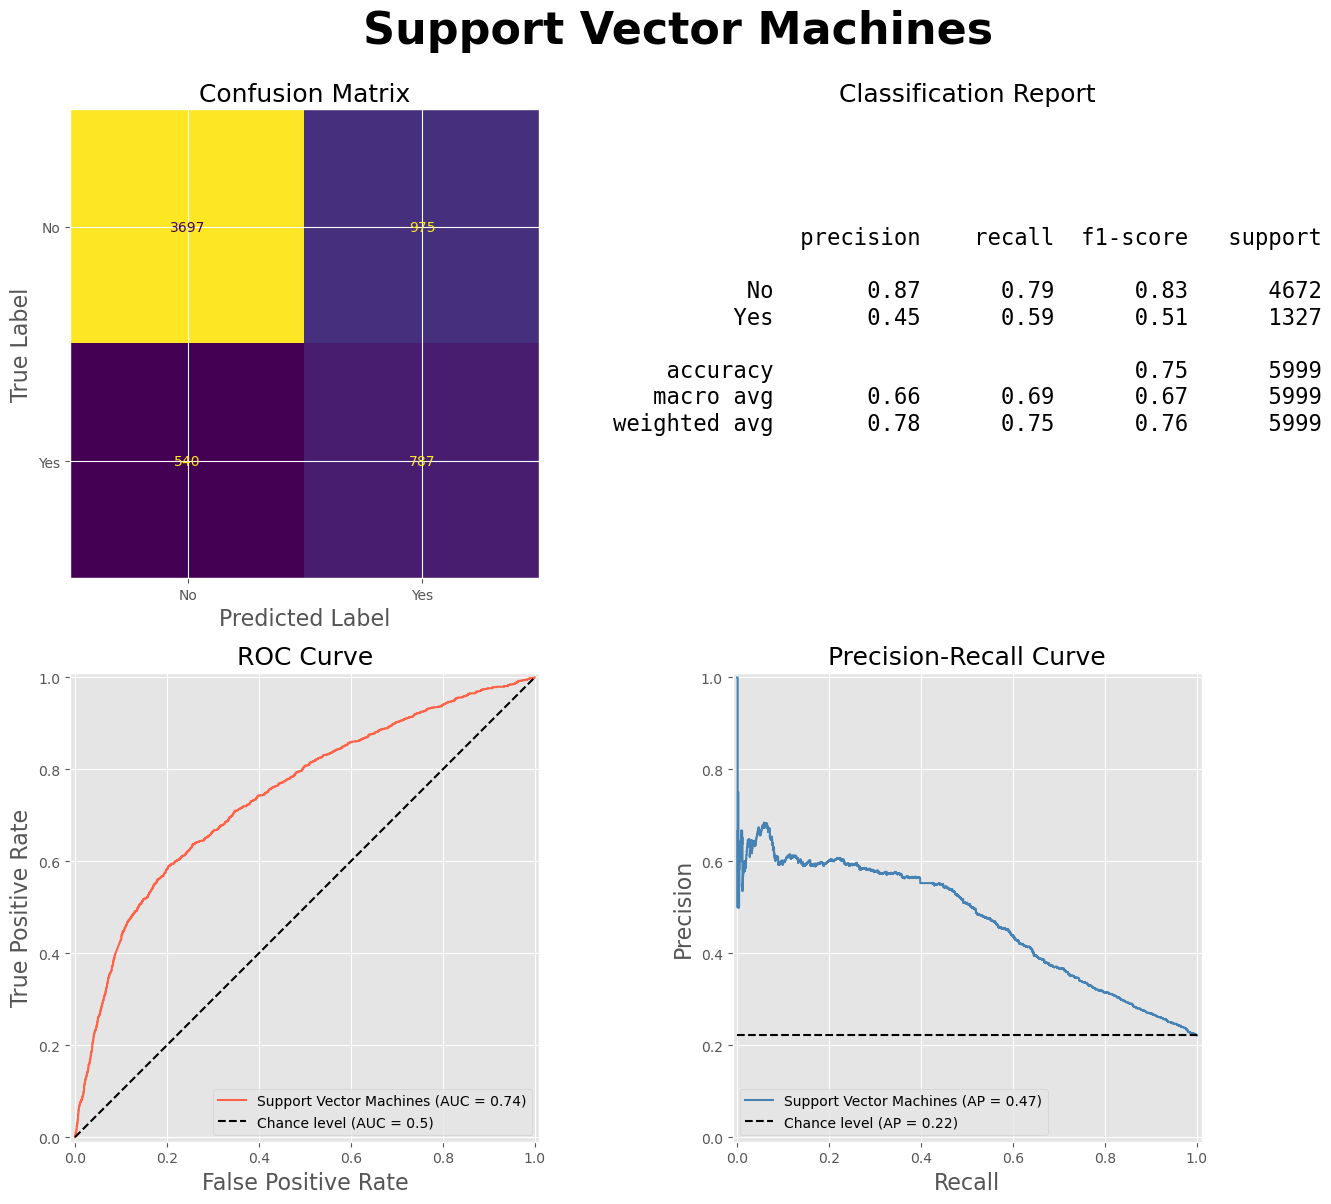

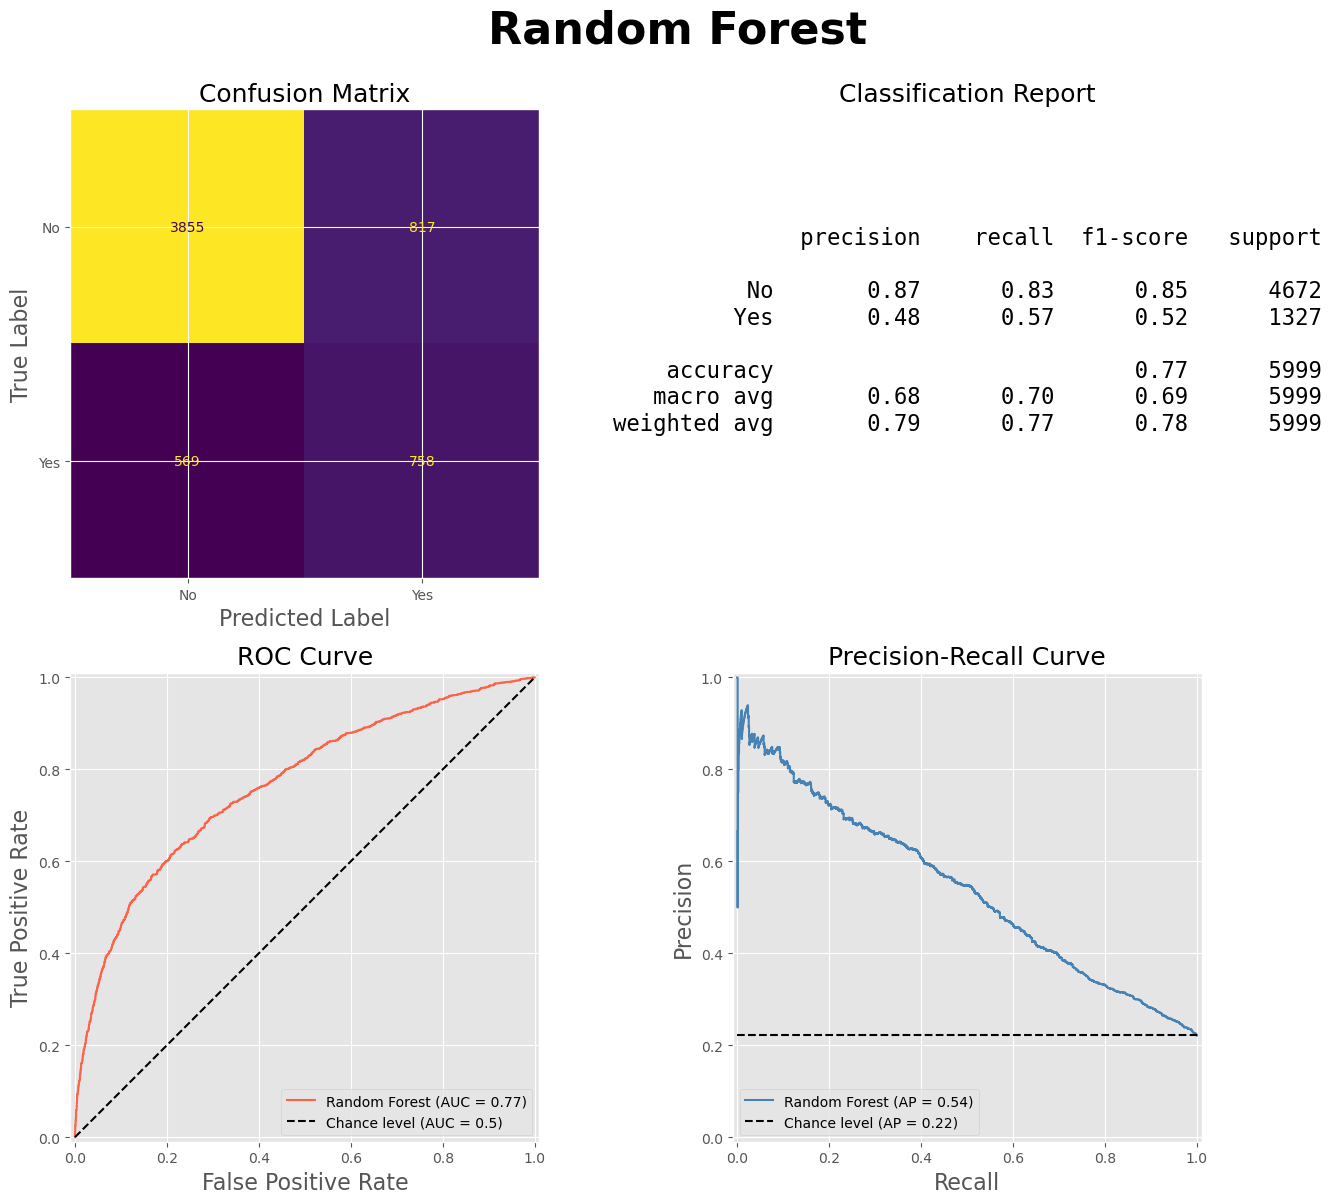

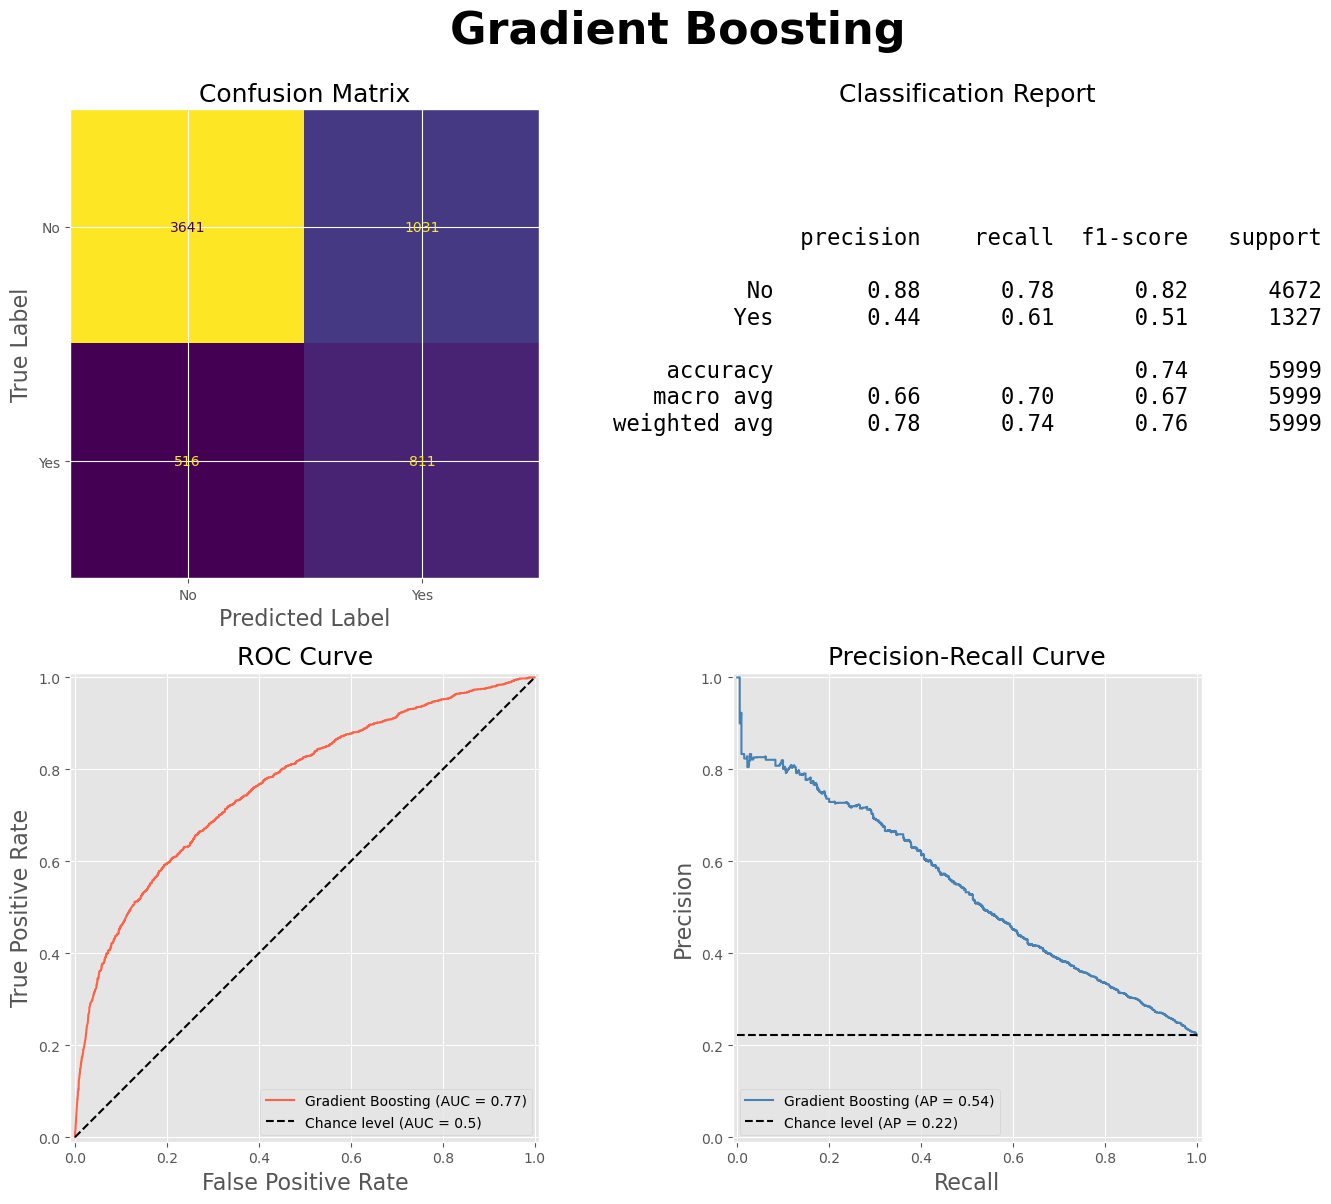

In [62]:
for name, model in models.items():
    functions.results(model, X_test, y_test, name)

,Model,Accuracy,Precision,Recall,F1,AUC,AP
0,Naive Bayes,0.7585,0.4598,0.5252,0.4903,0.7415,0.4845
1,Logistic Regression,0.7595,0.4651,0.5825,0.5172,0.7516,0.5068
2,Support Vector Machines,0.7475,0.4467,0.5931,0.5096,0.7438,0.4692
3,Random Forest,0.7690,0.4813,0.5712,0.5224,0.7659,0.5381
4,Gradient Boosting,0.7421,0.4403,0.6112,0.5118,0.7656,0.5393


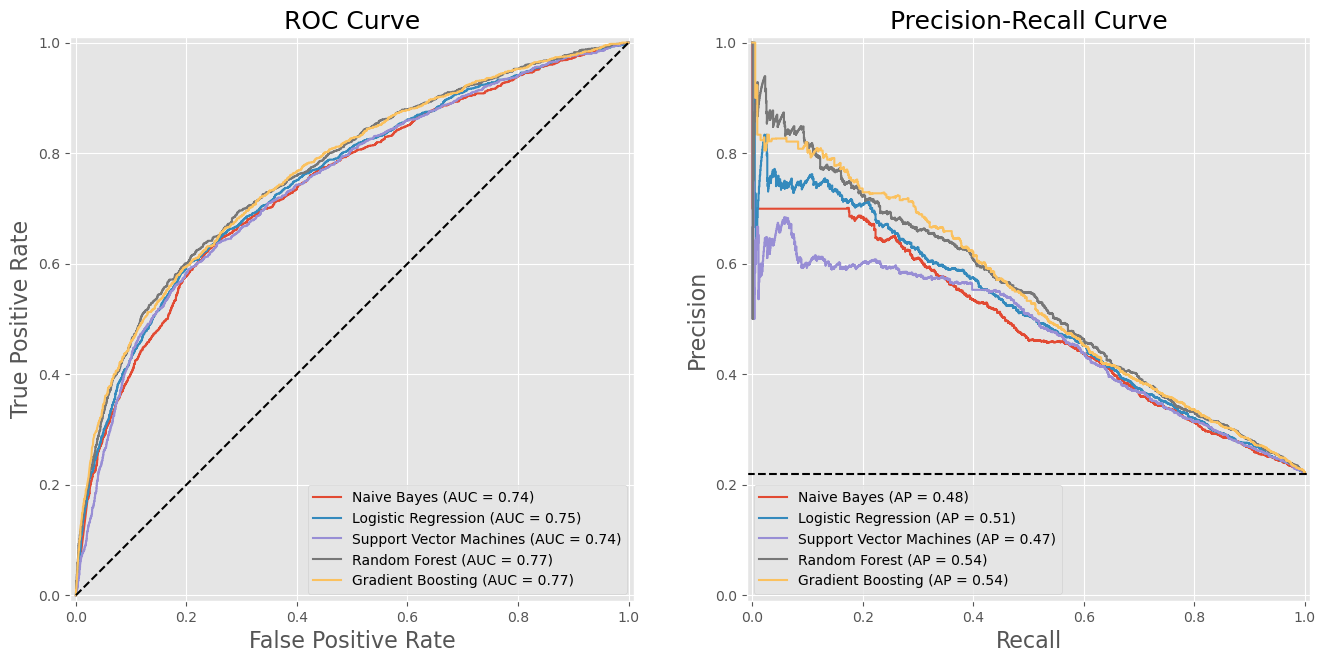

In [63]:
functions.summary(models, X_test, y_test)